[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Daily Sentiment Data:
         Date  Sentiment    Likes  Retweets
0  2022-01-27   0.083750  1274600    218623
1  2022-01-28   0.073361   216175     14290
2  2022-01-29   0.066667   471981     34219
3  2022-01-30   0.272095   829748     89133
4  2022-01-31  -0.100000   256975     32804

Raw Stock Data:
         Date       High        Low       Open      Close      Volume  \
0  2019-09-30  48.796001  47.222000  48.599998  48.174000  29399000.0   
1  2019-10-01  49.189999  47.826000  48.299999  48.938000  30813000.0   
2  2019-10-02  48.930000  47.886002  48.658001  48.625999  28157000.0   
3  2019-10-03  46.896000  44.855999  46.372002  46.605999  75422500.0   
4  2019-10-04  46.956001  45.613998  46.321999  46.285999  39975000.0   

   Adj Close  
0  48.174000  
1  48.938000  
2  48.625999  
3  46.605999  
4  46.285999  

Stock Data Dates Example:
0    2019-09-30
1    2019-10-01
2    2019-10-02
3    2019-10-03
4    2019-10-04
Name: Date, dtype: object

Merged Data:
         Date  Senti

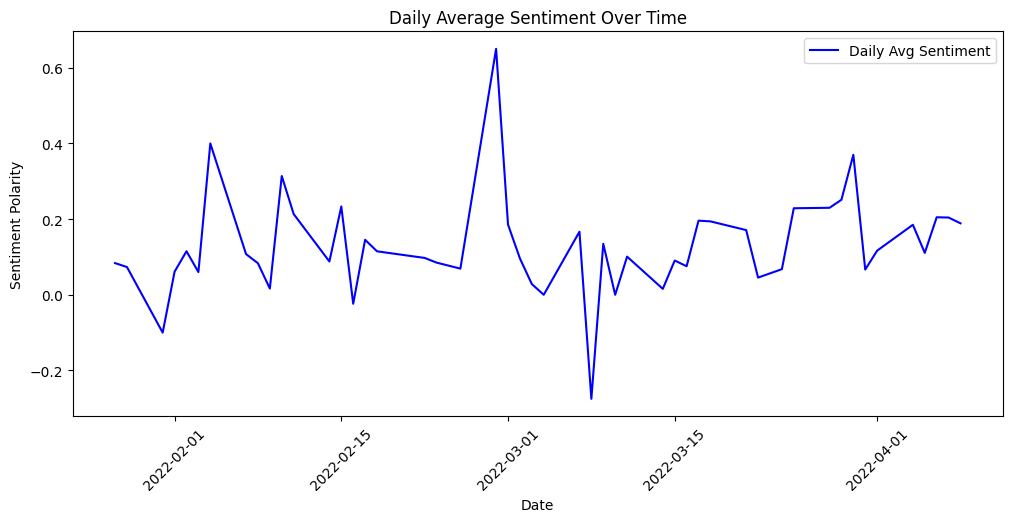

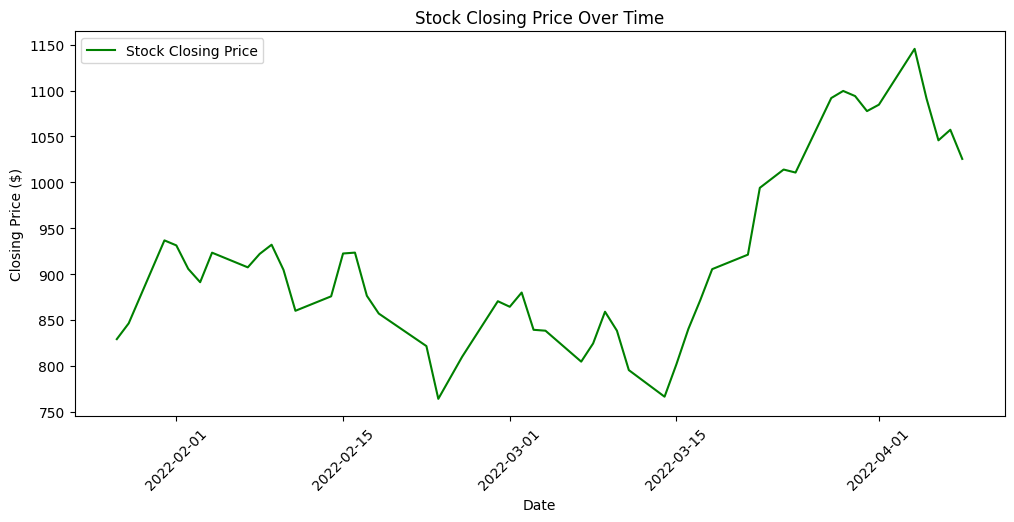

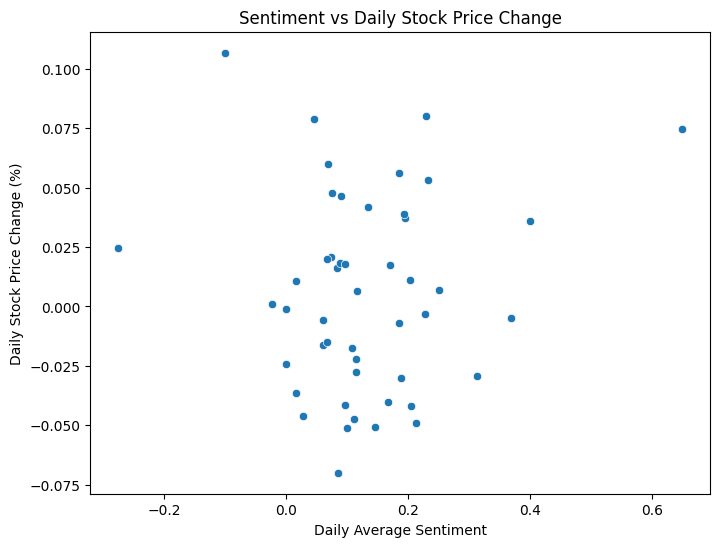


Correlation Matrix:
              Sentiment  Price_Change
Sentiment      1.000000      0.081323
Price_Change   0.081323      1.000000

Merged dataset saved as merged_sentiment_stock.csv


In [ ]:

import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# Download punkt once for TextBlob
nltk.download('punkt')

tweets_df = pd.read_csv("cleandata.csv")

# Compute Sentiment
tweets_df['Sentiment'] = tweets_df['Cleaned_Tweets'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Convert Date column to date only
tweets_df['Date'] = pd.to_datetime(tweets_df['Date']).dt.date

# Group by Date
daily_sentiment = tweets_df.groupby('Date').agg({
    'Sentiment': 'mean',
    'Likes': 'sum',
    'Retweets': 'sum'
}).reset_index()

print("\nDaily Sentiment Data:")
print(daily_sentiment.head())

stock_df = pd.read_csv("TSLA.csv")

# Preview to check columns
print("\nRaw Stock Data:")
print(stock_df.head())

# Make sure the stock Date column is proper DATE only
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date

print("\nStock Data Dates Example:")
print(stock_df['Date'].head())

merged_df = pd.merge(daily_sentiment, stock_df, on='Date')

print("\nMerged Data:")
print(merged_df.head())


# Sentiment Trend
plt.figure(figsize=(12,5))
plt.plot(merged_df['Date'], merged_df['Sentiment'], label='Daily Avg Sentiment', color='blue')
plt.xlabel("Date")
plt.ylabel("Sentiment Polarity")
plt.title("Daily Average Sentiment Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Stock Price Trend (assuming 'Close' column exists)
plt.figure(figsize=(12,5))
plt.plot(merged_df['Date'], merged_df['Close'], label='Stock Closing Price', color='green')
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.title("Stock Closing Price Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Sentiment vs Price Change
merged_df['Price_Change'] = merged_df['Close'].pct_change()

plt.figure(figsize=(8,6))
sns.scatterplot(x='Sentiment', y='Price_Change', data=merged_df)
plt.xlabel("Daily Average Sentiment")
plt.ylabel("Daily Stock Price Change (%)")
plt.title("Sentiment vs Daily Stock Price Change")
plt.show()

# Correlation
print("\nCorrelation Matrix:")
print(merged_df[['Sentiment', 'Price_Change']].corr())

merged_df.to_csv("merged_sentiment_stock.csv", index=False)
print("\nMerged dataset saved as merged_sentiment_stock.csv")
